In [ ]:
import plotly.graph_objects as go
import numpy as np

X, Y, Z = np.mgrid[-5:5:40j, -5:5:40j, 0:5:20j]

values = X * X * 0.5 + Y * Y + Z * Z * 2

fig = go.Figure(data=go.Isosurface(
    x=X.flatten(),
    y=Y.flatten(),
    z=Z.flatten(),
    value=values.flatten(),
    isomin=30,
    isomax=50,
    surface=dict(count=3, fill=0.7, pattern='odd'),
    showscale=False, 
    caps=dict(x_show=True, y_show=True),
    ))

fig.update_layout(
    margin=dict(t=0, l=0, b=0), 
    scene_camera_eye=dict(x=1.86, y=0.61, z=0.98))
fig.write_html("muestra_1.html")
fig.show()

In [1]:
from folium.plugins import MarkerCluster
from folium import plugins
import folium
import folium.plugins
import branca
import branca.colormap as cm
import pandas as pd

import json

from branca.element import MacroElement

from folium.folium import Map
from folium.utilities import parse_options, get_bounds

from jinja2 import Template

somgraph=pd.read_excel ('COORDENADAS_CONGRESO.xlsx')
somgraph.astype(float).sum().astype(int).astype(str)
somgraph.columns = somgraph.columns.str.strip() 

m = plugins.DualMap(location=(4.27,46.12), tiles='stamenwatercolor', zoom_start=4)

mc=MarkerCluster()
fg_2 = folium.FeatureGroup(name='Cluster SOM').add_to(m.m2)
for row in somgraph.itertuples():
    if(row.clusters==0):
        mc.add_child(folium.Marker(location=[row.Latitude,row.Longitude], radius=10,
                    popup=row.Dato,icon=folium.Icon(color='red',icon_color='white',icon='tint',angle=0,prefix='fa'))).add_to(fg_2)
    elif(row.clusters==1):
        mc.add_child(folium.Marker(location=[row.Latitude,row.Longitude], radius=10,
                    popup=row.Dato,icon=folium.Icon(color='red',icon_color='white',icon='tint',angle=0,prefix='fa'))).add_to(fg_2)
    elif(row.clusters==2):
        mc.add_child(folium.Marker(location=[row.Latitude,row.Longitude], radius=10,
                    popup=row.Dato,icon=folium.Icon(color='blue',icon_color='white',icon='tint',angle=0,prefix='fa'))).add_to(fg_2)
    elif(row.clusters==3):
        mc.add_child(folium.Marker(location=[row.Latitude,row.Longitude], radius=10,
                    popup=row.Dato,icon=folium.Icon(color='royalblue',icon_color='white',icon='tint',angle=0,prefix='fa'))).add_to(fg_2)
    elif(row.clusters==4):
        mc.add_child(folium.Marker(location=[row.Latitude,row.Longitude], radius=10,
                    popup=row.Dato,icon=folium.Icon(color='navy',icon_color='white',icon='tint',angle=0,prefix='fa'))).add_to(fg_2)
fg = folium.FeatureGroup(name="groups").add_to(m.m1)

g1 = plugins.FeatureGroupSubGroup(fg, "Pluma Lixiviados")
m.add_child(g1)

for row in somgraph.itertuples():
    if(row.clusters==0):
        folium.Marker(location=[row.Latitude,row.Longitude], radius=10,
                    popup=row.Dato,icon=folium.Icon(color='red',icon_color='white',icon='tint',angle=0,prefix='fa')).add_to(g1)
    elif(row.clusters==1):
        folium.Marker(location=[row.Latitude,row.Longitude], radius=10,
                    popup=row.Dato,icon=folium.Icon(color='red',icon_color='white',icon='tint',angle=0,prefix='fa')).add_to(g1)
        

folium.LayerControl(collapsed=False).add_to(m)
m.save(outfile= "Graph_1.html")
m

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:41: UserWarning: color argument of Icon should be one of: {'lightgray', 'cadetblue', 'pink', 'orange', 'red', 'lightred', 'darkgreen', 'lightblue', 'black', 'darkblue', 'green', 'purple', 'beige', 'gray', 'darkpurple', 'blue', 'white', 'lightgreen', 'darkred'}.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:38: UserWarning: color argument of Icon should be one of: {'lightgray', 'cadetblue', 'pink', 'orange', 'red', 'lightred', 'darkgreen', 'lightblue', 'black', 'darkblue', 'green', 'purple', 'beige', 'gray', 'darkpurple', 'blue', 'white', 'lightgreen', 'darkred'}.


In [7]:
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
import scipy as sp
import scipy.ndimage
import matplotlib.pyplot as plt
df=pd.read_excel('SOM_salida.xlsx')
dc=pd.read_excel("COORDENADAS_CONGRESO.xlsx")

In [8]:
x1 = np.asarray(dc.Longitude.tolist())
y1 = np.asarray(dc.Latitude.tolist())
z1 = np.asarray(dc.logRes.tolist())

x2 = np.asarray(df.Longitude.tolist())
y2 = np.asarray(df.Latitude.tolist())
z2 = np.asarray(df.clusters.tolist())

In [9]:
x_arr1          = np.linspace(np.min(x1), np.max(x1), 500)
y_arr1         = np.linspace(np.min(y1), np.max(y1), 500)
x_mesh1, y_mesh1 = np.meshgrid(x_arr1, y_arr1)

x_arr2          = np.linspace(np.min(x2), np.max(x2), 500)
y_arr2         = np.linspace(np.min(y2), np.max(y2), 500)
x_mesh2, y_mesh2 = np.meshgrid(x_arr2, y_arr2)

In [10]:
z_mesh1 = griddata((x1, y1), z1, (x_mesh1, y_mesh1), method='linear')
z_mesh2 = griddata((x2, y2), z2, (x_mesh2, y_mesh2), method='linear')

In [11]:
sigma = [5, 5]
z_mesh1 = sp.ndimage.filters.gaussian_filter(z_mesh1, sigma, mode='constant')
z_mesh2 = sp.ndimage.filters.gaussian_filter(z_mesh2, sigma, mode='constant')

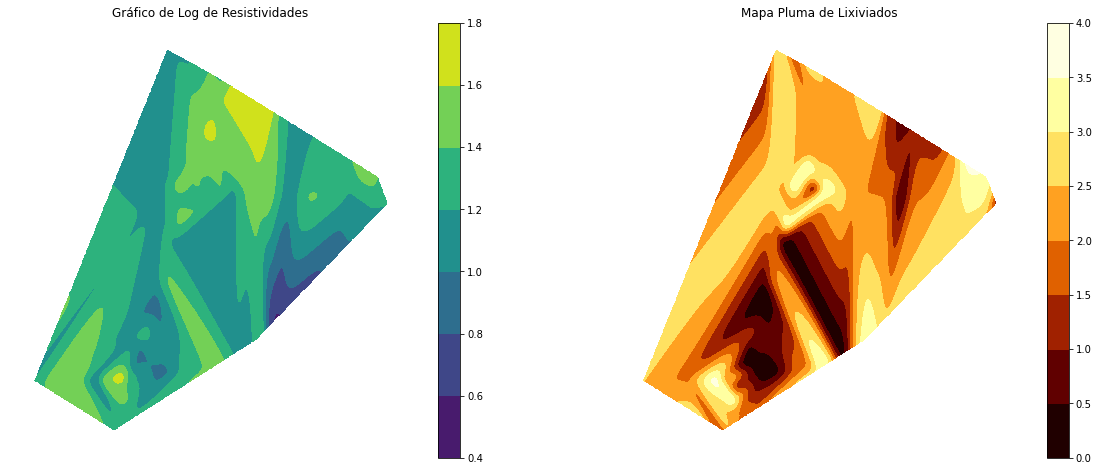

In [12]:
fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
contourf = plt.contourf(x_mesh1, y_mesh1, z_mesh1,cmap='viridis')
plt.colorbar()
plt.title('Gráfico de Log de Resistividades', fontsize=12)
plt.axis('off')


plt.subplot(1, 2, 2)
contourf = plt.contourf(x_mesh2, y_mesh2, z_mesh2,cmap='afmhot')
plt.colorbar()
plt.title('Mapa Pluma de Lixiviados', fontsize=12)
https://matplotlib.org/stable/gallery/color/named_colors.html

plt.savefig("my_plot_graph.png")

